In [6]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

In [7]:
#Instance
model = YOLO('yolov8n-seg.yaml')  # build a new model from YAML
model = YOLO('yolov8n-seg.pt')  # Transfer the weights from a pretrained model (recommended for training)

In [21]:
import yaml
with open("./dsb_yolo_roboflow/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['names'])

In [22]:
!cd dsb_yolo_roboflow
!mkdir results

A subdirectory or file results already exists.


In [23]:
#Define a project --> Destination directory for all results
project = "./dsb_yolo_roboflow/results"
#Define subdirectory for this specific training
name = "50_epochs" #note that if you run the training again, it creates a directory: 20_epochs-2
# name = "3_epochs-" #for tutorial

In [24]:
results = model.train(data='./dsb_yolo_roboflow/data.yaml',
                      project=project,
                      name=name,
                      epochs=50,
                      patience=5, #I am setting patience=0 to disable early stopping.
                      batch=4,
                      imgsz=512)

New https://pypi.org/project/ultralytics/8.2.2 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.47  Python-3.10.14 torch-2.2.2 CUDA:0 (NVIDIA GeForce RTX 2070 with Max-Q Design, 8192MiB)
engine\trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=./dsb_yolo_roboflow/data.yaml, epochs=50, time=None, patience=5, batch=4, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=./dsb_yolo_roboflow/results, name=50_epochs, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=No

100%|███████████████████████████████████████████████████████████████████████████████| 755k/755k [00:00<00:00, 7.48MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

  9                  -1  1    164608  ultralytics.nn.modules.block.SPPF            [256, 256, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  1     37248  ultralytics.nn.modules.block.C2f             [192, 64, 1]                  
 16                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
 17            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|█████████████████████████████████████████████████████████████████████████████| 6.23M/6.23M [00:00<00:00, 10.6MB/s]


AMP: checks passed 


train: Scanning C:\Users\anami\OneDrive\Desktop\kaggle\dsb_yolo_roboflow\train\labels... 498 images, 0 backgrounds, 0 c

train: New cache created: C:\Users\anami\OneDrive\Desktop\kaggle\dsb_yolo_roboflow\train\labels.cache



val: Scanning C:\Users\anami\OneDrive\Desktop\kaggle\dsb_yolo_roboflow\valid\labels... 166 images, 0 backgrounds, 0 cor


val: New cache created: C:\Users\anami\OneDrive\Desktop\kaggle\dsb_yolo_roboflow\valid\labels.cache
Plotting labels to dsb_yolo_roboflow\results\50_epochs\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 8 dataloader workers
Logging results to dsb_yolo_roboflow\results\50_epochs
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.15G      1.795      2.643      1.949      1.166         67        512: 100%|██████████| 125/125 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        166       7148      0.764      0.642      0.682      0.301      0.768      0.627      0.675      0.273



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.07G      1.624      2.397      1.237      1.098        158        512: 100%|██████████| 125/125 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        166       7148      0.657      0.652       0.64      0.329      0.676      0.628      0.633      0.294



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.05G       1.58      2.336      1.172      1.084        148        512: 100%|██████████| 125/125 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all        166       7148      0.652      0.668      0.657      0.349      0.667      0.627      0.658      0.277

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.51G      1.572      2.331      1.142      1.084         61        512: 100%|██████████| 125/125 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        166       7148      0.774      0.708       0.74      0.372      0.769      0.702      0.735       0.33



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.41G      1.496      2.238      1.128      1.078        110        512: 100%|██████████| 125/125 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all        166       7148      0.781      0.691       0.74      0.372      0.774      0.669      0.725      0.317

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.85G      1.516      2.252      1.115      1.078         65        512: 100%|██████████| 125/125 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all        166       7148      0.806      0.724       0.76      0.384      0.803      0.716       0.75      0.319

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.57G      1.481      2.203      1.086      1.064        157        512: 100%|██████████| 125/125 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        166       7148      0.742      0.721       0.73      0.377      0.725      0.679      0.686      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50       4.2G      1.439      2.113      1.046      1.047        115        512: 100%|██████████| 125/125 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all        166       7148      0.774      0.718      0.757       0.42      0.777      0.713      0.757      0.343

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.89G      1.436      2.082      1.006      1.044        185        512: 100%|██████████| 125/125 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        166       7148      0.767      0.725      0.749      0.404      0.787      0.723      0.759      0.364



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.25G      1.435      2.113      1.014      1.041        111        512: 100%|██████████| 125/125 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        166       7148      0.794      0.721      0.765       0.42      0.795      0.724      0.767      0.354



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.21G      1.419      2.081      1.007      1.054         21        512: 100%|██████████| 125/125 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        166       7148      0.784      0.729      0.763      0.423       0.78      0.715      0.753      0.354



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.76G      1.406      2.075      1.004      1.048        251        512: 100%|██████████| 125/125 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        166       7148      0.778      0.725      0.763      0.436      0.764      0.706      0.738      0.344



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.28G       1.39      2.091     0.9928      1.034         93        512: 100%|██████████| 125/125 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        166       7148      0.807      0.725      0.774      0.433       0.81      0.713      0.768      0.355



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.29G      1.383      2.058     0.9924      1.032        190        512: 100%|██████████| 125/125 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        166       7148      0.792      0.714       0.77      0.429      0.769      0.691      0.732      0.341



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.66G      1.406      2.063     0.9958      1.045         88        512: 100%|██████████| 125/125 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        166       7148       0.81      0.728      0.787      0.438      0.804      0.713       0.77      0.352



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.35G      1.375      2.051      0.983      1.033        141        512: 100%|██████████| 125/125 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        166       7148      0.822      0.719      0.785      0.438      0.778      0.709       0.75      0.346



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.35G       1.37       2.06     0.9545      1.032        209        512: 100%|██████████| 125/125 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all        166       7148      0.794       0.72      0.777      0.447      0.776       0.69      0.747      0.358

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.55G      1.357      2.023     0.9448      1.021        117        512: 100%|██████████| 125/125 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        166       7148      0.786      0.726      0.773       0.44      0.781      0.711      0.765      0.368



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.99G       1.36      1.973     0.9355      1.026         51        512: 100%|██████████| 125/125 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        166       7148      0.808      0.718      0.781      0.451      0.815      0.707      0.769       0.37



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.71G      1.371      2.051     0.9505      1.038         96        512: 100%|██████████| 125/125 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        166       7148      0.801      0.721      0.783       0.45      0.794      0.696      0.757      0.341



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.64G      1.366      2.031     0.9341      1.027         47        512: 100%|██████████| 125/125 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        166       7148      0.806      0.715      0.779      0.431      0.779      0.703      0.759       0.35



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.42G      1.379      2.055     0.9394      1.023         68        512: 100%|██████████| 125/125 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        166       7148      0.811      0.737      0.795      0.451      0.798      0.708      0.764      0.345



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.85G      1.335      1.973     0.9222      1.013        223        512: 100%|██████████| 125/125 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        166       7148      0.802      0.738      0.791      0.458      0.811      0.725      0.784      0.368



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.54G      1.291      1.896     0.9011      1.005        451        512: 100%|██████████| 125/125 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        166       7148      0.807      0.727      0.789      0.444      0.789      0.704      0.763      0.351



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.54G      1.325      1.981     0.9137      1.017         85        512: 100%|██████████| 125/125 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        166       7148      0.789      0.727      0.785      0.462      0.772      0.707      0.762      0.359



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50       2.4G      1.329      1.992     0.9246      1.023         83        512: 100%|██████████| 125/125 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        166       7148      0.824      0.728      0.796       0.46      0.806      0.712       0.77      0.356



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50       3.3G      1.329       1.97     0.9169      1.018         88        512: 100%|██████████| 125/125 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all        166       7148      0.796      0.735      0.791      0.455      0.787      0.723      0.777      0.364

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.88G      1.293      1.941      0.906      1.024         79        512: 100%|██████████| 125/125 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        166       7148      0.823      0.731      0.801      0.466      0.816      0.714      0.786      0.368



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.35G      1.279      1.902     0.8899      1.009        138        512: 100%|██████████| 125/125 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        166       7148      0.791      0.727      0.783      0.454       0.79      0.722       0.78       0.38



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.26G      1.304      1.926      0.894      1.007        105        512: 100%|██████████| 125/125 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        166       7148      0.821      0.729      0.801      0.458        0.8      0.709      0.774       0.36



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.67G      1.275      1.896     0.8788     0.9963         72        512: 100%|██████████| 125/125 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        166       7148      0.813      0.739      0.799      0.469      0.791      0.722      0.775      0.371



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.51G      1.289      1.904     0.8763     0.9956         73        512: 100%|██████████| 125/125 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        166       7148      0.795      0.725      0.788      0.463      0.789        0.7      0.763      0.357



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.32G      1.293       1.91     0.8913      1.007        213        512: 100%|██████████| 125/125 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        166       7148      0.821      0.734      0.801      0.473       0.81      0.721      0.777      0.371



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.03G      1.304      1.916     0.8779      1.008        239        512: 100%|██████████| 125/125 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        166       7148      0.812      0.737      0.797      0.467      0.819      0.739      0.801      0.401



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.59G       1.29       1.89     0.8847      1.003         55        512: 100%|██████████| 125/125 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all        166       7148      0.798      0.737      0.798       0.47      0.793      0.729      0.784      0.379

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.82G      1.291      1.918      0.886      1.005         30        512: 100%|██████████| 125/125 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        166       7148      0.819      0.742      0.805      0.471      0.806      0.724      0.784      0.378



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.12G      1.275      1.898     0.8689      1.006        326        512: 100%|██████████| 125/125 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        166       7148      0.808       0.74      0.802      0.476      0.803      0.726      0.786      0.374



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.25G      1.281      1.912     0.8625     0.9913        106        512: 100%|██████████| 125/125 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        166       7148      0.808       0.74        0.8      0.477      0.793      0.722      0.775      0.376



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.41G      1.262      1.876     0.8612     0.9995        185        512: 100%|██████████| 125/125 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        166       7148      0.822      0.743      0.805      0.479        0.8      0.724       0.78       0.38
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 34, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



39 epochs completed in 0.306 hours.
Optimizer stripped from dsb_yolo_roboflow\results\50_epochs\weights\last.pt, 6.8MB
Optimizer stripped from dsb_yolo_roboflow\results\50_epochs\weights\best.pt, 6.8MB

Validating dsb_yolo_roboflow\results\50_epochs\weights\best.pt...
Ultralytics YOLOv8.1.47  Python-3.10.14 torch-2.2.2 CUDA:0 (NVIDIA GeForce RTX 2070 with Max-Q Design, 8192MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all        166       7148      0.815      0.737      0.797      0.467      0.819      0.739      0.802      0.401
Speed: 0.5ms preprocess, 5.3ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to dsb_yolo_roboflow\results\50_epochs


In [25]:
from IPython.display import Image

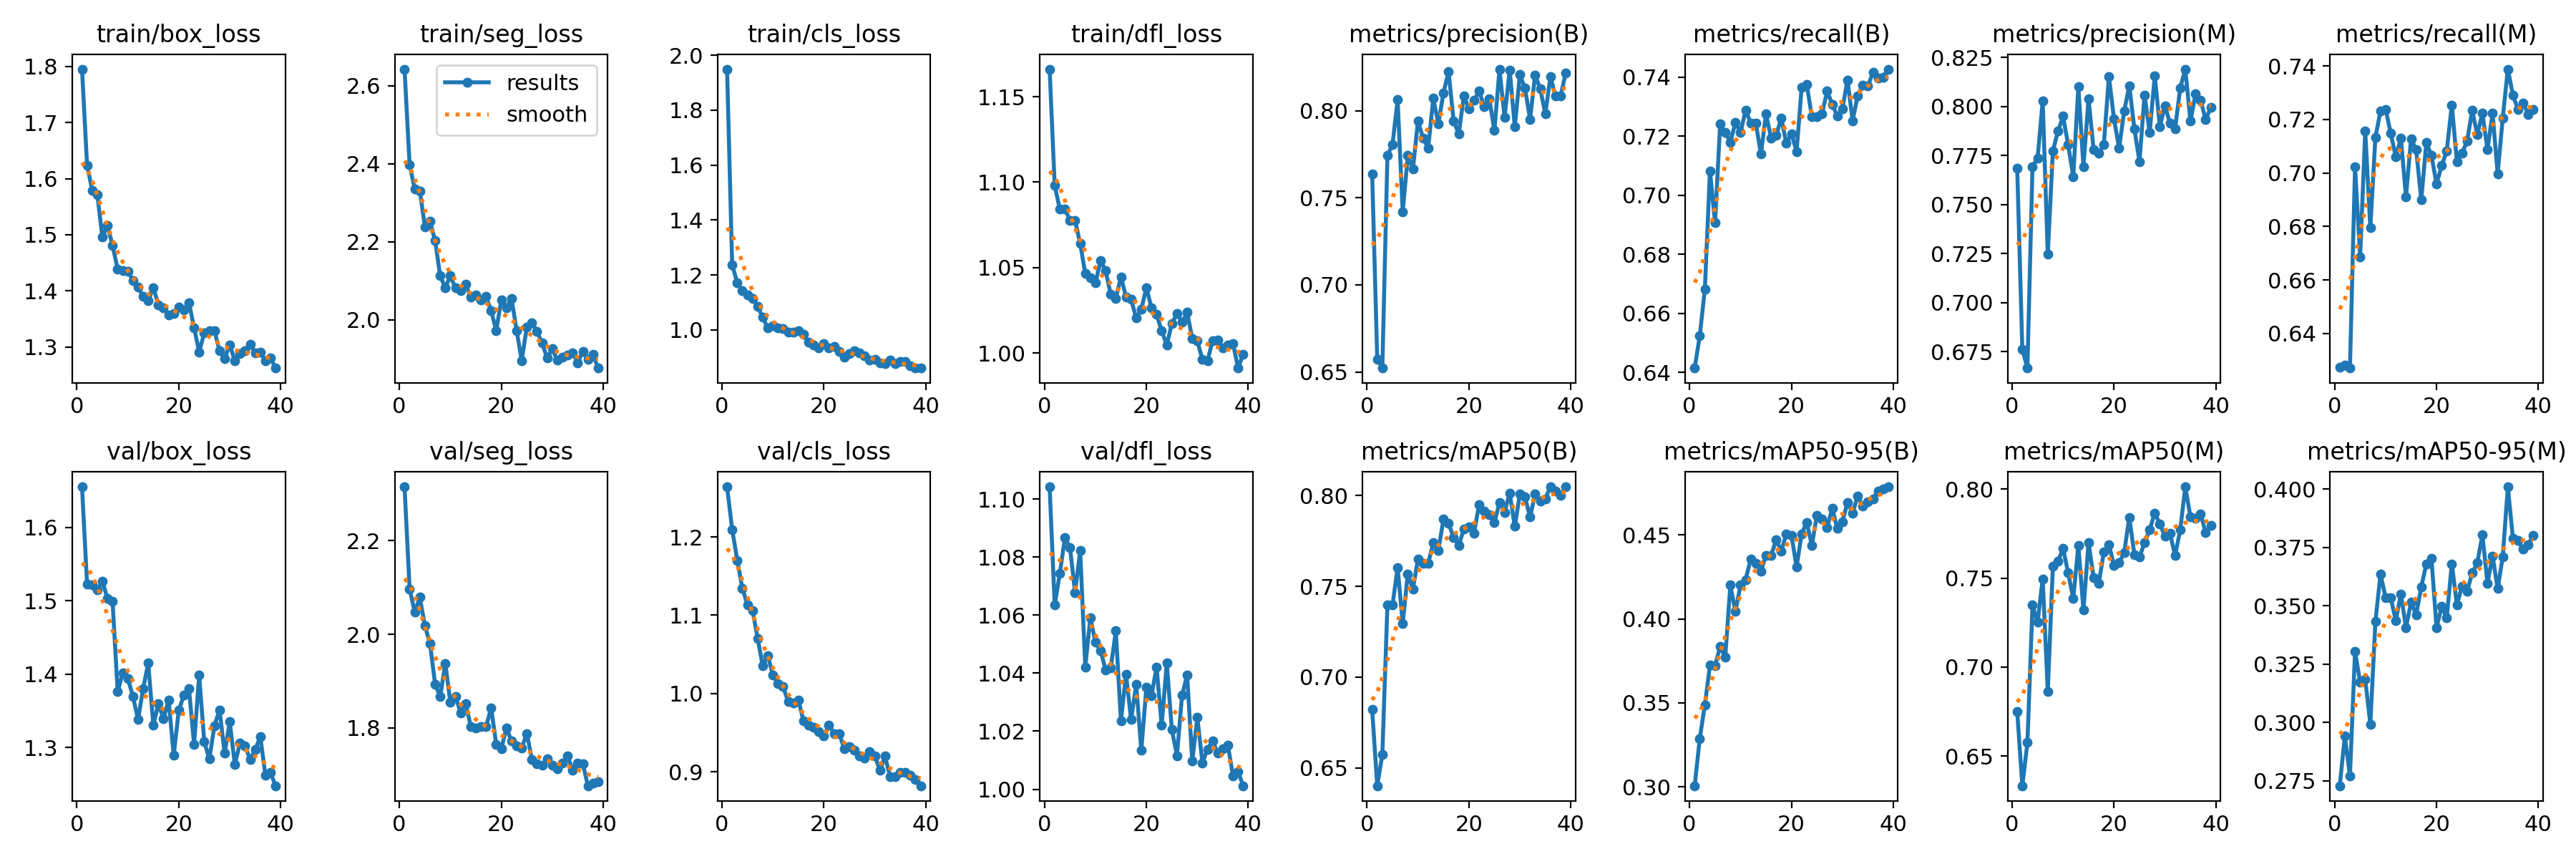

In [26]:
Image("./dsb_yolo_roboflow/results/50_epochs/results.png")

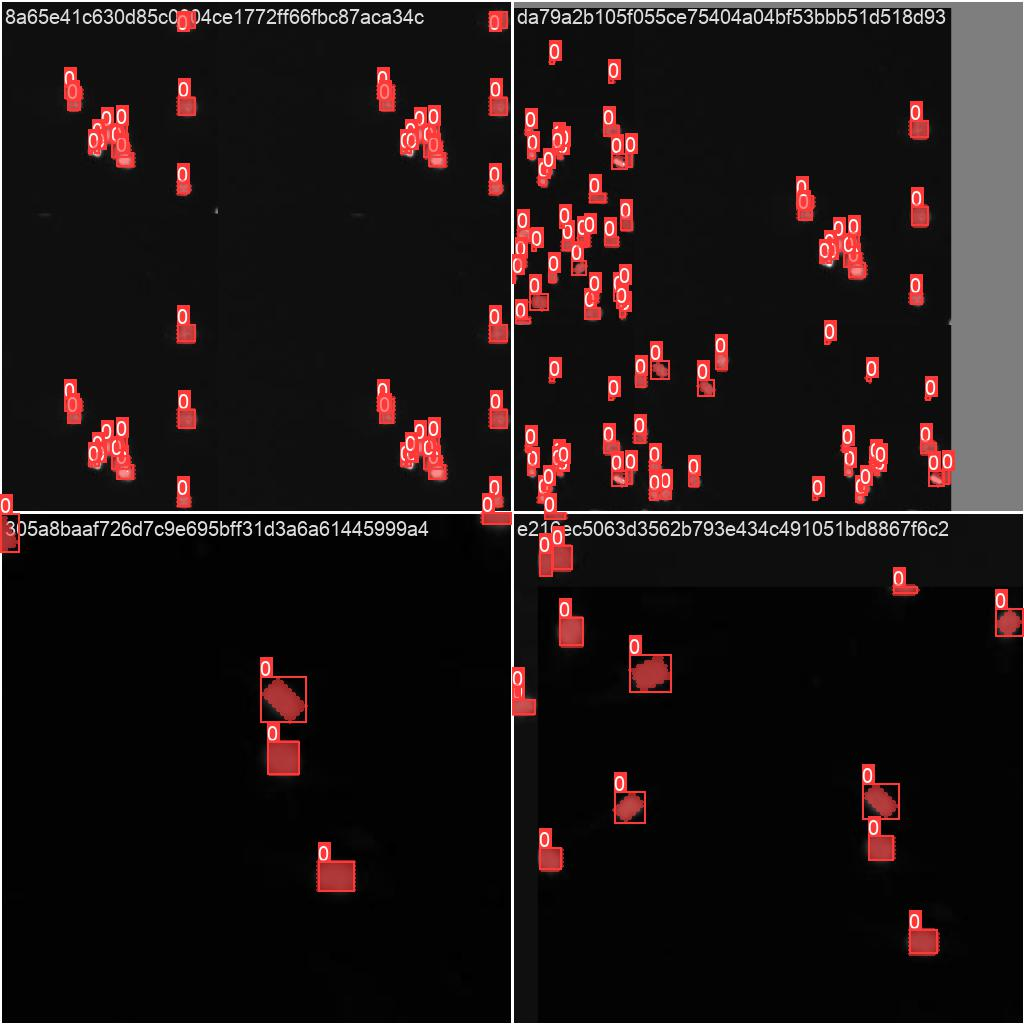

In [27]:
Image(filename='./dsb_yolo_roboflow/results/50_epochs/train_batch0.jpg', width=900)

In [33]:
my_new_model = YOLO('./dsb_yolo_roboflow/results/50_epochs/weights/best.pt')

In [35]:
new_result_array = new_results[0].plot()
plt.figure(figsize=(9, 9))
plt.imshow(new_result_array)

In [49]:
metrics = my_new_model.val(
    split = 'test'
)

Ultralytics YOLOv8.1.47  Python-3.10.14 torch-2.2.2 CUDA:0 (NVIDIA GeForce RTX 2070 with Max-Q Design, 8192MiB)


val: Scanning C:\Users\anami\OneDrive\Desktop\kaggle\dsb_yolo_roboflow\test\labels... 65 images, 0 backgrounds, 0 corru

val: New cache created: C:\Users\anami\OneDrive\Desktop\kaggle\dsb_yolo_roboflow\test\labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all         65       4153      0.692      0.665      0.682      0.331      0.668      0.608      0.622      0.235
Speed: 0.6ms preprocess, 15.2ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to runs\segment\val2


In [54]:
metrics.seg.map50

0.6221192256502751